# Insurance Claims- Fraud Detection

# Problem Statement:

Business case:


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df_n=pd.read_csv('insurance_fraud.csv')

In [3]:
df_n

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df_n.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df=df_n.drop(['age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable'
             ,'policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level'
             ,'insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss'
             ,'incident_date','incident_type','collision_type','incident_severity','authorities_contacted'
             ,'incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved'
             ,'auto_make','auto_model','auto_year','_c39','property_damage','police_report_available'],axis=1)

In [7]:
df

,months_as_customer,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1,2,71610,6510,13020,52080,Y
1,228,0,0,5070,780,780,3510,Y
2,134,2,3,34650,7700,3850,23100,N
3,256,1,2,63400,6340,6340,50720,Y
4,228,0,1,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...
995,3,0,1,87200,17440,8720,61040,N
996,285,2,3,108480,18080,18080,72320,N
997,130,2,3,67500,7500,7500,52500,N
998,458,0,1,46980,5220,5220,36540,N


In [8]:
df.columns

Index(['months_as_customer', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'fraud_reported'],
      dtype='object')

In [9]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Checking Null Values

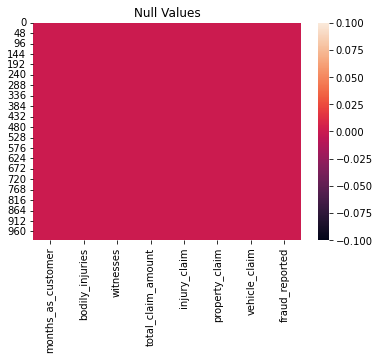

In [10]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum().sum()

0

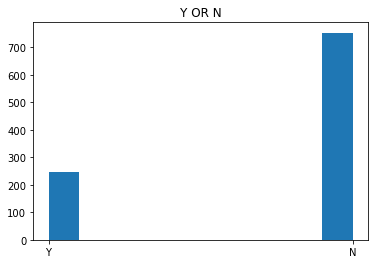

In [14]:
df['fraud_reported'].hist(grid=False)
plt.title('Y OR N')
plt.show()

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [19]:
le.inverse_transform([0,1])

array(['N', 'Y'], dtype=object)

In [20]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# Checking Correlation

In [21]:
df.corr()

,months_as_customer,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,0.020544
bodily_injuries,-0.010162,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,0.033877
witnesses,0.058383,-0.005606,1.000000,-0.011114,-0.024843,0.052640,-0.022564,0.049497
total_claim_amount,0.062108,0.047093,-0.011114,1.000000,0.805025,0.810686,0.982773,0.163651
injury_claim,0.065329,0.047319,-0.024843,0.805025,1.000000,0.563866,0.722878,0.090975
property_claim,0.034940,0.039749,0.052640,0.810686,0.563866,1.000000,0.732090,0.137835
vehicle_claim,0.061013,0.043449,-0.022564,0.982773,0.722878,0.732090,1.000000,0.170049
fraud_reported,0.020544,0.033877,0.049497,0.163651,0.090975,0.137835,0.170049,1.000000


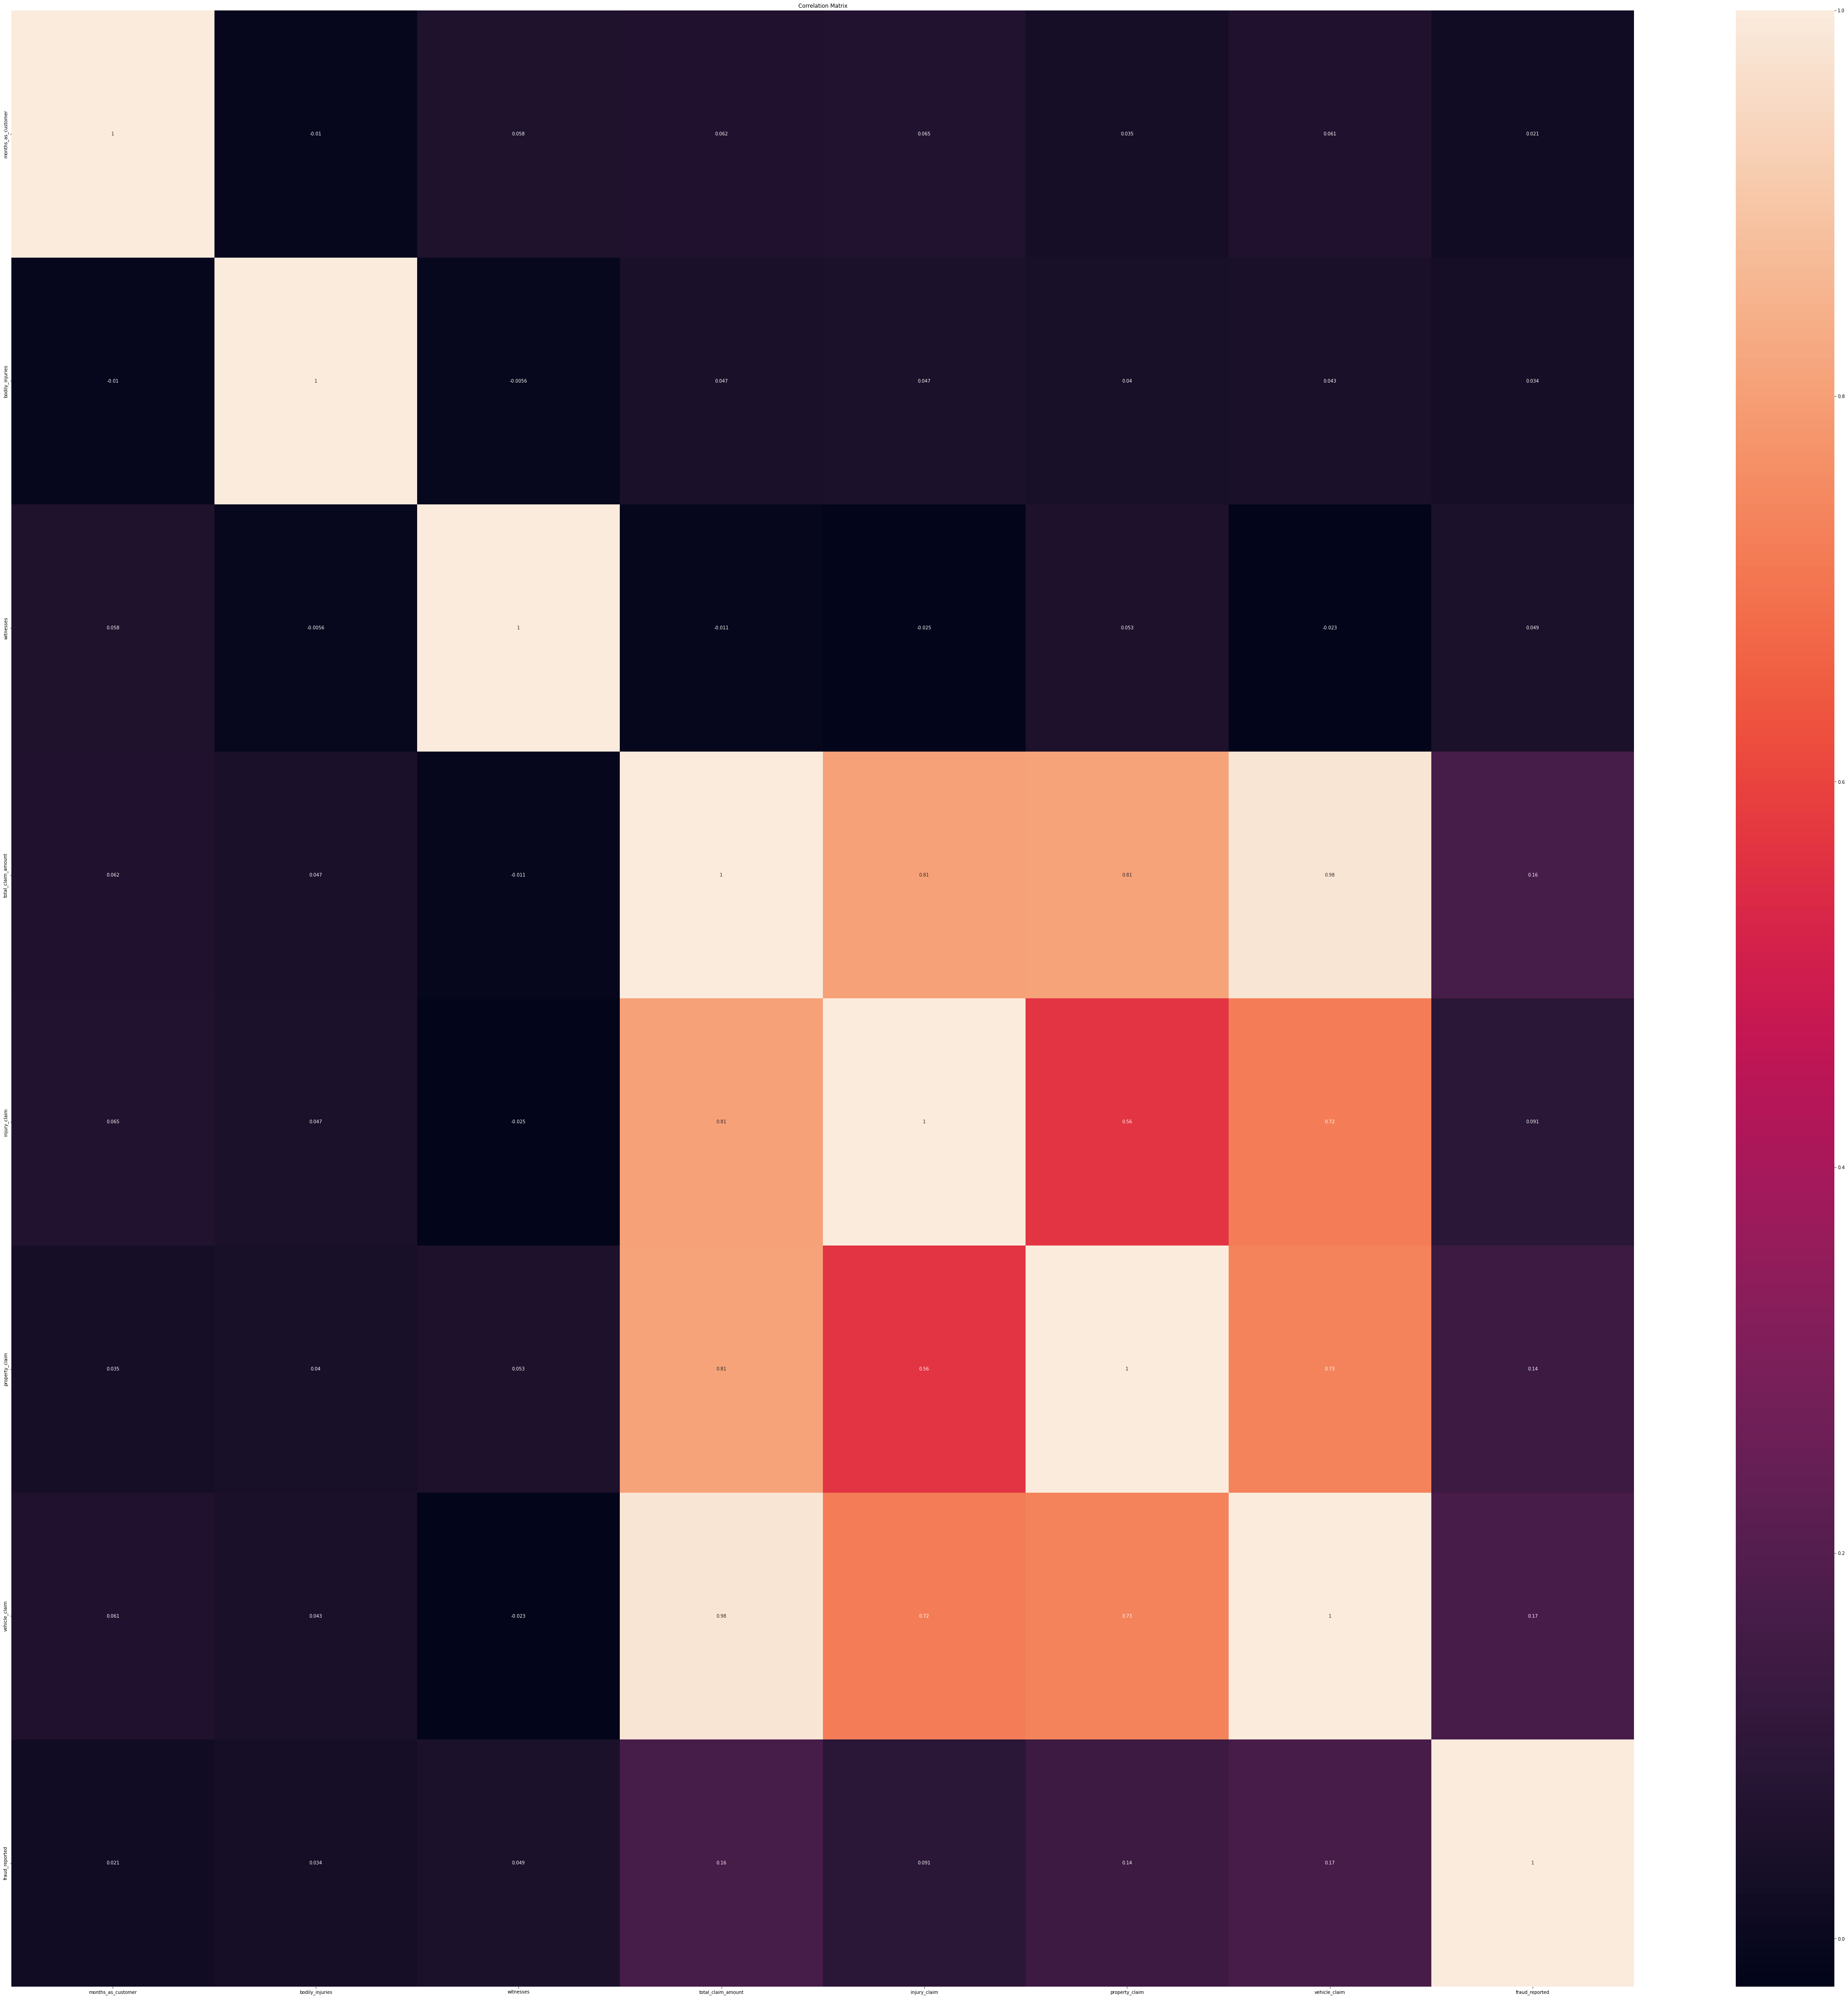

In [22]:
corr_mat=df.corr()
# size of the canvas
plt.figure(figsize=[80,80])
# plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Insurance correlation_matrix.jpg')
plt.show()

Let's print the correlaion values of independent variables with target varibales in target  form

In [23]:
corr_matrix=df.corr()
corr_matrix

,months_as_customer,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,0.020544
bodily_injuries,-0.010162,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,0.033877
witnesses,0.058383,-0.005606,1.000000,-0.011114,-0.024843,0.052640,-0.022564,0.049497
total_claim_amount,0.062108,0.047093,-0.011114,1.000000,0.805025,0.810686,0.982773,0.163651
injury_claim,0.065329,0.047319,-0.024843,0.805025,1.000000,0.563866,0.722878,0.090975
property_claim,0.034940,0.039749,0.052640,0.810686,0.563866,1.000000,0.732090,0.137835
vehicle_claim,0.061013,0.043449,-0.022564,0.982773,0.722878,0.732090,1.000000,0.170049
fraud_reported,0.020544,0.033877,0.049497,0.163651,0.090975,0.137835,0.170049,1.000000


In [24]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [25]:
corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported        1.000000
vehicle_claim         0.170049
total_claim_amount    0.163651
property_claim        0.137835
injury_claim          0.090975
witnesses             0.049497
bodily_injuries       0.033877
months_as_customer    0.020544
Name: fraud_reported, dtype: float64

There is a strong positive correlation between the vehicle_claim and fraud_reported, also there is 
weak positive correlation between months as customer and fraud reported

Splitting independent and target variables in x and y before checking & removing skewness and outliers.

In [26]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

# Checking Outliers

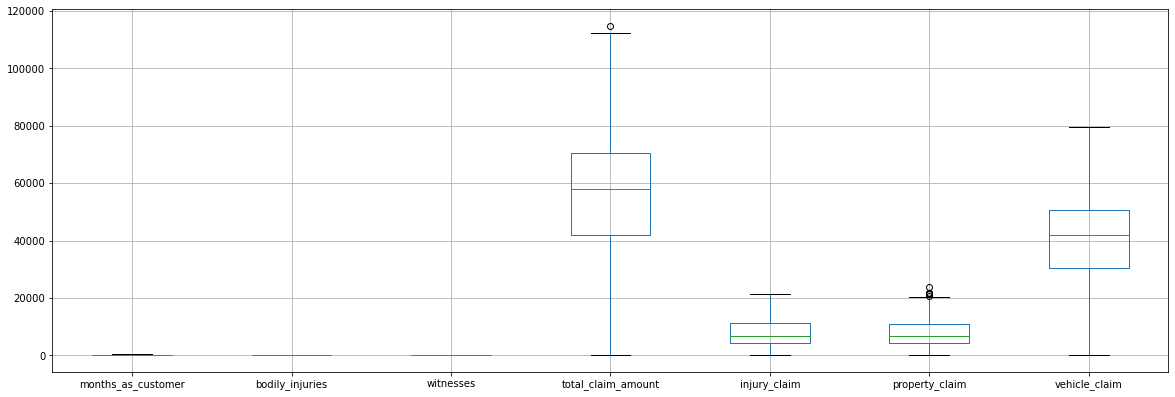

In [27]:
# plotting boxplots for the independent columns
x.iloc[:,0:9].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

WE can see outliers in  multiple columns,let's remove the outliers using the following technique

Remove Outliers

In [28]:
feature=['months_as_customer', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

In [29]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls
    

In [30]:
index_list=[]
for i in feature:
    index_list.extend(outliers(df,i))

In [31]:
index_list

[11, 163, 299, 301, 500, 591, 687]

In [32]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [33]:
df_cleaned=remove(df,index_list)

In [34]:
df_cleaned.shape

(993, 8)

In [35]:
df_cleaned

,months_as_customer,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1,2,71610,6510,13020,52080,1
1,228,0,0,5070,780,780,3510,1
2,134,2,3,34650,7700,3850,23100,0
3,256,1,2,63400,6340,6340,50720,1
4,228,0,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...
995,3,0,1,87200,17440,8720,61040,0
996,285,2,3,108480,18080,18080,72320,0
997,130,2,3,67500,7500,7500,52500,0
998,458,0,1,46980,5220,5220,36540,0


Splitting independent and dependent variables in x and y


In [36]:
x=df_cleaned.drop('fraud_reported',axis=1)
y=df_cleaned['fraud_reported']

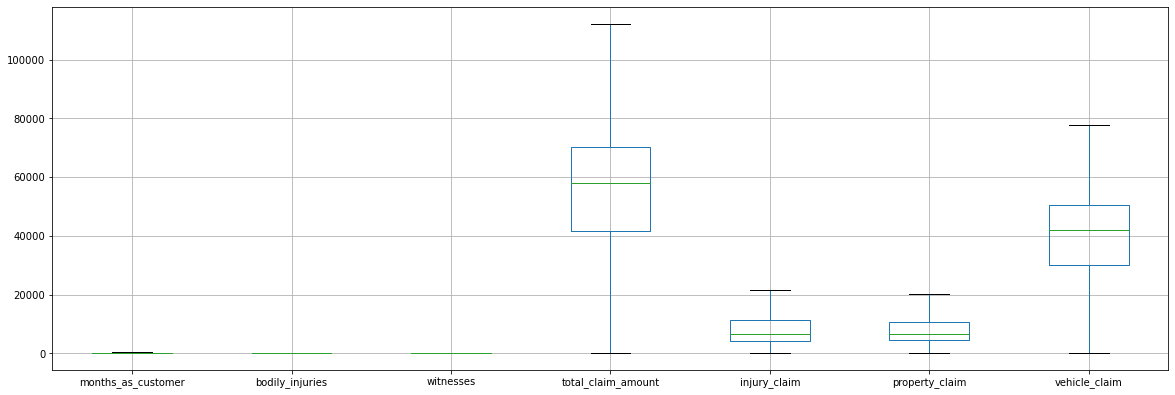

In [37]:
# plotting boxplots for the independent columns
x.iloc[:,0:9].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Let's Quantify

In [38]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

months_as_customer    True
bodily_injuries       True
witnesses             True
total_claim_amount    True
injury_claim          True
property_claim        True
vehicle_claim         True
dtype: bool

Therefore our dataset is free from outliers

Let's check for skewness

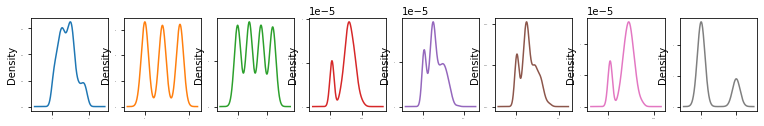

In [39]:
df_cleaned.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can see skewness in most of the columns of our dataset

In [40]:
# Checking skewness
x.skew().sort_values(ascending=False)

months_as_customer    0.356847
property_claim        0.289001
injury_claim          0.269162
witnesses             0.020715
bodily_injuries       0.018611
total_claim_amount   -0.611799
vehicle_claim        -0.630166
dtype: float64

We can see skewness in multiple columns.Let's remove skewness using Power Transform technique

In [41]:
from sklearn.preprocessing import power_transform

In [42]:
x_new=power_transform(x)

In [43]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

1   -0.127090
0   -0.134600
2   -0.153246
5   -0.380483
4   -0.415271
3   -0.521987
6   -0.530470
dtype: float64

In [44]:
type(x_new)

numpy.ndarray

In [45]:
x.columns

Index(['months_as_customer', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [46]:
x=pd.DataFrame(x_new,columns=x.columns)

In [47]:
x

,months_as_customer,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.050556,0.112663,0.517383,0.731250,0.012272,1.115898,0.764828
1,0.300561,-1.252214,-1.411005,-1.774396,-1.519873,-1.559549,-1.783427
2,-0.517860,1.178982,1.289829,-0.713353,0.230008,-0.576628,-0.816628
3,0.520252,0.112663,0.517383,0.403633,-0.020210,-0.025902,0.688325
4,0.300561,-1.252214,-0.355695,-1.727561,-1.298009,-1.623657,-1.736937
...,...,...,...,...,...,...,...
988,-2.293680,-1.252214,-0.355695,1.361484,1.640702,0.420848,1.273169
989,0.739293,1.178982,1.289829,2.236267,1.719068,1.820951,1.922699
990,-0.556438,1.178982,1.289829,0.566842,0.194502,0.199141,0.788490
991,1.916429,-1.252214,-0.355695,-0.240935,-0.244566,-0.259929,-0.097338


In [48]:
# Validating that skewness has been removed or not
x.skew().sort_values(ascending=False)

bodily_injuries      -0.127090
months_as_customer   -0.134600
witnesses            -0.153246
property_claim       -0.380483
injury_claim         -0.415271
total_claim_amount   -0.521987
vehicle_claim        -0.530470
dtype: float64

In [49]:
sk=x.skew()

In [50]:
sk

months_as_customer   -0.134600
bodily_injuries      -0.127090
witnesses            -0.153246
total_claim_amount   -0.521987
injury_claim         -0.415271
property_claim       -0.380483
vehicle_claim        -0.530470
dtype: float64

In [51]:
sk[np.abs(sk)>0.5].all()

True

In [52]:
sk[np.abs(sk)>0.5]

total_claim_amount   -0.521987
vehicle_claim        -0.530470
dtype: float64

In [53]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed successfully, now we can proceed with further steps

# Training process begin

Finding the best random state

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [55]:
maxaccu=0
maxrs=0
for  i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random_state',i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('Accuracy',maxaccu,'Random State',i)

accuracy 0.7437185929648241 random_state 1
Accuracy 0.7437185929648241 Random State 1
accuracy 0.7587939698492462 random_state 2
Accuracy 0.7587939698492462 Random State 2
accuracy 0.7185929648241206 random_state 3
accuracy 0.7587939698492462 random_state 4
accuracy 0.7336683417085427 random_state 5
accuracy 0.7638190954773869 random_state 6
Accuracy 0.7638190954773869 Random State 6
accuracy 0.7487437185929648 random_state 7
accuracy 0.7185929648241206 random_state 8
accuracy 0.7437185929648241 random_state 9
accuracy 0.7688442211055276 random_state 10
Accuracy 0.7688442211055276 Random State 10
accuracy 0.7085427135678392 random_state 11
accuracy 0.7336683417085427 random_state 12
accuracy 0.7839195979899497 random_state 13
Accuracy 0.7839195979899497 Random State 13
accuracy 0.8090452261306532 random_state 14
Accuracy 0.8090452261306532 Random State 14
accuracy 0.7537688442211056 random_state 15
accuracy 0.7336683417085427 random_state 16
accuracy 0.7788944723618091 random_state 17


accuracy 0.7437185929648241 random_state 185
accuracy 0.7688442211055276 random_state 186
accuracy 0.7236180904522613 random_state 187
accuracy 0.7537688442211056 random_state 188
accuracy 0.8341708542713567 random_state 189
Accuracy 0.8341708542713567 Random State 189
accuracy 0.7738693467336684 random_state 190
accuracy 0.6984924623115578 random_state 191
accuracy 0.8040201005025126 random_state 192
accuracy 0.7839195979899497 random_state 193
accuracy 0.8040201005025126 random_state 194
accuracy 0.7889447236180904 random_state 195
accuracy 0.7587939698492462 random_state 196
accuracy 0.7738693467336684 random_state 197
accuracy 0.7286432160804021 random_state 198
accuracy 0.7788944723618091 random_state 199
accuracy 0.7587939698492462 random_state 200
accuracy 0.7085427135678392 random_state 201
accuracy 0.7537688442211056 random_state 202
accuracy 0.7989949748743719 random_state 203
accuracy 0.7537688442211056 random_state 204
accuracy 0.7989949748743719 random_state 205
accuracy 0

accuracy 0.7236180904522613 random_state 372
accuracy 0.7989949748743719 random_state 373
accuracy 0.7788944723618091 random_state 374
accuracy 0.7487437185929648 random_state 375
accuracy 0.7587939698492462 random_state 376
accuracy 0.7286432160804021 random_state 377
accuracy 0.7788944723618091 random_state 378
accuracy 0.7286432160804021 random_state 379
accuracy 0.7638190954773869 random_state 380
accuracy 0.7537688442211056 random_state 381
accuracy 0.7688442211055276 random_state 382
accuracy 0.7286432160804021 random_state 383
accuracy 0.7135678391959799 random_state 384
accuracy 0.7788944723618091 random_state 385
accuracy 0.7487437185929648 random_state 386
accuracy 0.7487437185929648 random_state 387
accuracy 0.7839195979899497 random_state 388
accuracy 0.7236180904522613 random_state 389
accuracy 0.7135678391959799 random_state 390
accuracy 0.7738693467336684 random_state 391
accuracy 0.7688442211055276 random_state 392
accuracy 0.7286432160804021 random_state 393
accuracy 0

accuracy 0.7788944723618091 random_state 560
accuracy 0.7638190954773869 random_state 561
accuracy 0.7638190954773869 random_state 562
accuracy 0.7085427135678392 random_state 563
accuracy 0.7286432160804021 random_state 564
accuracy 0.7537688442211056 random_state 565
accuracy 0.7386934673366834 random_state 566
accuracy 0.7286432160804021 random_state 567
accuracy 0.7638190954773869 random_state 568
accuracy 0.7688442211055276 random_state 569
accuracy 0.7386934673366834 random_state 570
accuracy 0.7939698492462312 random_state 571
accuracy 0.7437185929648241 random_state 572
accuracy 0.7939698492462312 random_state 573
accuracy 0.7386934673366834 random_state 574
accuracy 0.7537688442211056 random_state 575
accuracy 0.7889447236180904 random_state 576
accuracy 0.6884422110552764 random_state 577
accuracy 0.7286432160804021 random_state 578
accuracy 0.7688442211055276 random_state 579
accuracy 0.6934673366834171 random_state 580
accuracy 0.7487437185929648 random_state 581
accuracy 0

accuracy 0.7487437185929648 random_state 743
accuracy 0.7286432160804021 random_state 744
accuracy 0.7386934673366834 random_state 745
accuracy 0.7638190954773869 random_state 746
accuracy 0.8090452261306532 random_state 747
accuracy 0.7437185929648241 random_state 748
accuracy 0.7437185929648241 random_state 749
accuracy 0.7185929648241206 random_state 750
accuracy 0.7537688442211056 random_state 751
accuracy 0.7085427135678392 random_state 752
accuracy 0.7487437185929648 random_state 753
accuracy 0.7738693467336684 random_state 754
accuracy 0.8140703517587939 random_state 755
accuracy 0.7889447236180904 random_state 756
accuracy 0.7688442211055276 random_state 757
accuracy 0.7286432160804021 random_state 758
accuracy 0.7236180904522613 random_state 759
accuracy 0.7537688442211056 random_state 760
accuracy 0.7386934673366834 random_state 761
accuracy 0.7286432160804021 random_state 762
accuracy 0.7487437185929648 random_state 763
accuracy 0.7788944723618091 random_state 764
accuracy 0

accuracy 0.7487437185929648 random_state 929
accuracy 0.7587939698492462 random_state 930
accuracy 0.7688442211055276 random_state 931
accuracy 0.7185929648241206 random_state 932
accuracy 0.7286432160804021 random_state 933
accuracy 0.7939698492462312 random_state 934
accuracy 0.8140703517587939 random_state 935
accuracy 0.7286432160804021 random_state 936
accuracy 0.7185929648241206 random_state 937
accuracy 0.7638190954773869 random_state 938
accuracy 0.7336683417085427 random_state 939
accuracy 0.7035175879396985 random_state 940
accuracy 0.7537688442211056 random_state 941
accuracy 0.7386934673366834 random_state 942
accuracy 0.7738693467336684 random_state 943
accuracy 0.7939698492462312 random_state 944
accuracy 0.7437185929648241 random_state 945
accuracy 0.7437185929648241 random_state 946
accuracy 0.7738693467336684 random_state 947
accuracy 0.7738693467336684 random_state 948
accuracy 0.7437185929648241 random_state 949
accuracy 0.7537688442211056 random_state 950
accuracy 0

In [56]:
print('Best accuracy is',maxaccu,'on random state',maxrs)

Best accuracy is 0.8391959798994975 on random state 501


We have found best random state value as 501. We will create our train_test_split using this random_state

# Creating Train_Test_Split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=501)

In [58]:
x_train

,months_as_customer,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
79,-0.489184,0.112663,0.517383,-0.092396,0.637780,0.666700,-0.425286
680,-0.013003,-1.252214,-0.355695,-1.813842,-1.590054,-1.816580,-1.811008
752,-0.321394,-1.252214,1.289829,-0.187382,0.292917,0.302617,-0.330598
865,0.776272,-1.252214,-1.411005,-0.020132,-0.116034,-0.126004,0.144479
425,1.973009,1.178982,1.289829,0.099450,-0.172371,0.825864,0.036699
...,...,...,...,...,...,...,...
480,1.795719,1.178982,-1.411005,-0.123580,1.329660,-0.308245,-0.451025
591,-2.293680,1.178982,-0.355695,-1.776664,-1.667349,-1.460320,-1.783868
679,1.092846,1.178982,-1.411005,-0.123580,-0.291034,0.640124,-0.181179
671,-0.605233,0.112663,0.517383,-1.798554,-2.171640,-1.477637,-1.790037


In [59]:
x_test

,months_as_customer,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
409,-1.370456,0.112663,0.517383,1.662290,0.261620,1.509380,1.841555
936,1.679702,-1.252214,-1.411005,1.008550,1.421023,0.264171,0.926858
296,0.020951,0.112663,-1.411005,-1.746012,-1.385992,-1.682154,-1.747310
776,-0.634828,-1.252214,-0.355695,-1.774720,-1.691122,-1.495252,-1.775903
907,-0.460720,-1.252214,0.517383,0.778996,1.271274,1.340829,0.295374
...,...,...,...,...,...,...,...
485,-1.926911,-1.252214,0.517383,0.883532,0.856372,0.898580,0.771587
287,-1.588193,-1.252214,0.517383,-1.651883,-1.238067,-1.278309,-1.677935
390,-0.303172,1.178982,0.517383,-0.213010,-0.340581,0.562729,-0.268475
592,0.746706,0.112663,1.289829,0.050376,-0.076514,0.976286,-0.110425


In [60]:
y_train

80     0
686    0
759    0
872    1
429    0
      ..
484    0
597    1
685    0
677    0
88     0
Name: fraud_reported, Length: 794, dtype: int32

In [61]:
y_test

413    0
943    0
298    0
783    0
914    0
      ..
489    1
289    0
394    1
598    0
523    0
Name: fraud_reported, Length: 199, dtype: int32

In [62]:
x_train.shape

(794, 7)

In [63]:
x_test.shape

(199, 7)

In [64]:
y_train.shape

(794,)

In [65]:
y_test.shape

(199,)

# Model Evaluation

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 83.91959798994975
[[165   0]
 [ 32   2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       165
           1       1.00      0.06      0.11        34

    accuracy                           0.84       199
   macro avg       0.92      0.53      0.51       199
weighted avg       0.87      0.84      0.77       199



# Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

Accuracy 66.83417085427136
[[122  43]
 [ 23  11]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       165
           1       0.20      0.32      0.25        34

    accuracy                           0.67       199
   macro avg       0.52      0.53      0.52       199
weighted avg       0.73      0.67      0.70       199



# Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

Accuracy 76.88442211055276
[[152  13]
 [ 33   1]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       165
           1       0.07      0.03      0.04        34

    accuracy                           0.77       199
   macro avg       0.45      0.48      0.46       199
weighted avg       0.69      0.77      0.73       199



# Support Vector Classifier

In [72]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred4=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred4)*100)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

Accuracy 82.91457286432161
[[165   0]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       165
           1       0.00      0.00      0.00        34

    accuracy                           0.83       199
   macro avg       0.41      0.50      0.45       199
weighted avg       0.69      0.83      0.75       199



# AdaBoost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred5=ad.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred5)*100)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

Accuracy 75.87939698492463
[[151  14]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       165
           1       0.00      0.00      0.00        34

    accuracy                           0.76       199
   macro avg       0.41      0.46      0.43       199
weighted avg       0.68      0.76      0.72       199



In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred6=gb.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred6)*100)
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

Accuracy 78.89447236180904
[[154  11]
 [ 31   3]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       165
           1       0.21      0.09      0.12        34

    accuracy                           0.79       199
   macro avg       0.52      0.51      0.50       199
weighted avg       0.73      0.79      0.75       199



Among these models Logistic Regression works well with an accuracy more than 83 percent and Support vector also performs well with an accuracy of more than 82 percent 